# Building a data science model that explains how these factors impacted home prices over the last 20 years.

## 🏡 Project Overview: Impact of Economic Indicators on Home Prices

We are building a data science model to understand **how various economic and demographic factors have influenced home prices in the US over the past 20 years**.

The dataset (`prepared_dataset.csv`) contains **monthly data** starting from 1987, with the following key columns:

- **CSUSHPISA**: Home Price Index (target variable)
- **Per_Capita_GDP**: Per capita GDP in USD
- **working_age_pop**: Working-age population
- **CPI**: Consumer Price Index
- **UNRATE**: Unemployment rate
- **EmpRate**: Employment rate
- **Cons_Material**: Construction material cost index
- **FEDFUNDS**: Federal funds interest rate
- **Num_Households**: Number of households
- **median_income**: Median income
- **Subsidy**: Government housing subsidy

📅 The dataset is indexed by **monthly timestamps**, which allows for temporal trend analysis.

---

### 🔍 Next Steps:

1. **Exploratory Data Analysis (EDA)**  
   - Understand the distribution and trends of features over time
   - Visualize correlation between predictors and the home price index
   - Detect missing values, outliers, and seasonality patterns

2. **Feature Engineering & Selection**  
   - Analyze correlation matrix to identify important predictors
   - Create lag features or moving averages if needed

3. **Model Building**  
   We'll apply and evaluate multiple regression models to predict home prices:
   - **Linear Regression**
   - **ElasticNet**
   - **Random Forest**
   - **Gradient Boosting**
   - **Support Vector Regression (SVR)**

4. **Model Evaluation**  
   Each model will be assessed based on:
   - **Mean Squared Error (MSE)**
   - **R² Score**

---

📌 **Goal**: To identify which economic indicators have the most influence on housing prices and to build a reliable prediction model based on them.


In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Num_Households,median_income,Subsidy
DATE,,,,,,,,,,,,,
1987-01-01,63.963,1987,1,37132.000000,153837100,111.4,6.6,70.15437,107.6,6.43,89479.0,63060,11.506
1987-02-01,64.423,1987,2,37239.333333,154050900,111.8,6.6,70.28407,107.9,6.10,89479.0,63060,11.506
1987-03-01,64.734,1987,3,37346.666667,154193700,112.2,6.6,70.31629,108.1,6.13,89479.0,63060,11.506
1987-04-01,65.130,1987,4,37454.000000,154340400,112.7,6.3,70.51045,108.3,6.37,89479.0,63060,11.506
1987-05-01,65.564,1987,5,37531.000000,154526700,113.0,6.3,70.81375,108.3,6.85,89479.0,63060,11.506


In [3]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Exploratory Data Analysis (EDA)

</div>


In [4]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Num_Households,median_income,Subsidy
count,438.000000,438.000000,4.380000e+02,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,141.250103,51567.611872,1.860699e+08,195.822594,5.779680,70.784435,179.309447,3.152237,111604.296804,68874.703196,28.352626
std,60.266753,8184.907666,1.793289e+07,48.738371,1.678965,2.207418,56.041023,2.680456,12914.697803,5362.842904,9.676908
min,63.963000,37132.000000,1.538371e+08,111.400000,3.400000,60.168550,107.600000,0.050000,89479.000000,61150.000000,11.506000
25%,82.015250,43507.750000,1.681346e+08,155.125000,4.600000,69.555095,139.600000,0.332500,99627.000000,64710.000000,21.072000
50%,140.684500,53226.000000,1.905870e+08,193.650000,5.400000,71.259885,168.350000,2.940000,113343.000000,68340.000000,27.651000
75%,178.143750,57299.333333,2.030071e+08,236.015000,6.600000,72.170585,211.700000,5.297500,123229.000000,71000.000000,34.230000
max,306.234000,67499.000000,2.088164e+08,304.615000,14.800000,74.512330,353.015000,9.850000,131434.000000,81210.000000,53.573000


<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Correlation Analysis
Calculate the correlation matrix to measure the linear relationships between variables.

</div>


In [5]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,CPI,UNRATE,EmpRate,Cons_Material,FEDFUNDS,Num_Households,median_income,Subsidy
CSUSHPISA,1.000000,0.947759,0.874638,0.941438,-0.218695,-0.342762,0.956115,-0.572713,0.913335,0.882179,0.931368
Per_Capita_GDP,0.947759,1.000000,0.969880,0.982637,-0.173971,-0.405443,0.919836,-0.700813,0.985132,0.879740,0.942254
working_age_pop,0.874638,0.969880,1.000000,0.965418,-0.001772,-0.552973,0.853787,-0.801100,0.989765,0.772115,0.913425
CPI,0.941438,0.982637,0.965418,1.000000,-0.075740,-0.494567,0.952942,-0.734627,0.987207,0.835832,0.976279
UNRATE,-0.218695,-0.173971,-0.001772,-0.075740,1.000000,-0.751274,-0.140025,-0.367885,-0.054985,-0.387341,-0.043019
EmpRate,-0.342762,-0.405443,-0.552973,-0.494567,-0.751274,1.000000,-0.414472,0.727823,-0.526076,-0.134618,-0.486901
Cons_Material,0.956115,0.919836,0.853787,0.952942,-0.140025,-0.414472,1.000000,-0.603395,0.903593,0.821928,0.955751
FEDFUNDS,-0.572713,-0.700813,-0.801100,-0.734627,-0.367885,0.727823,-0.603395,1.000000,-0.777427,-0.417532,-0.706688
Num_Households,0.913335,0.985132,0.989765,0.987207,-0.054985,-0.526076,0.903593,-0.777427,1.000000,0.826728,0.948810
median_income,0.882179,0.879740,0.772115,0.835832,-0.387341,-0.134618,0.821928,-0.417532,0.826728,1.000000,0.821400


###### Visualize the correlation matrix using a heatmap to identify strong positive and negative correlations.

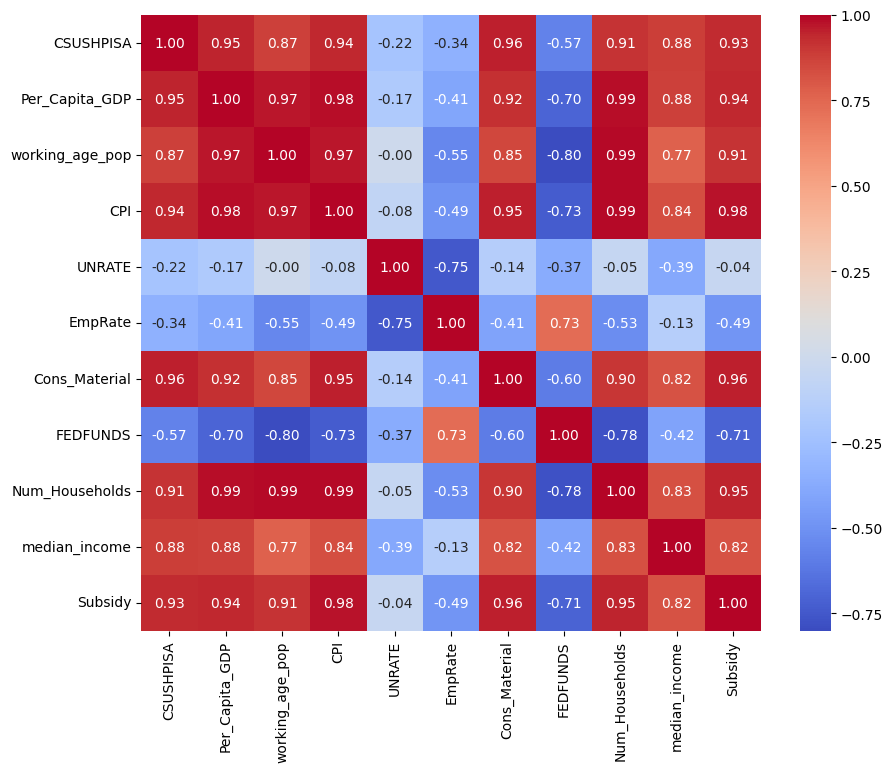

In [6]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Time Series Analysis:
For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

</div>


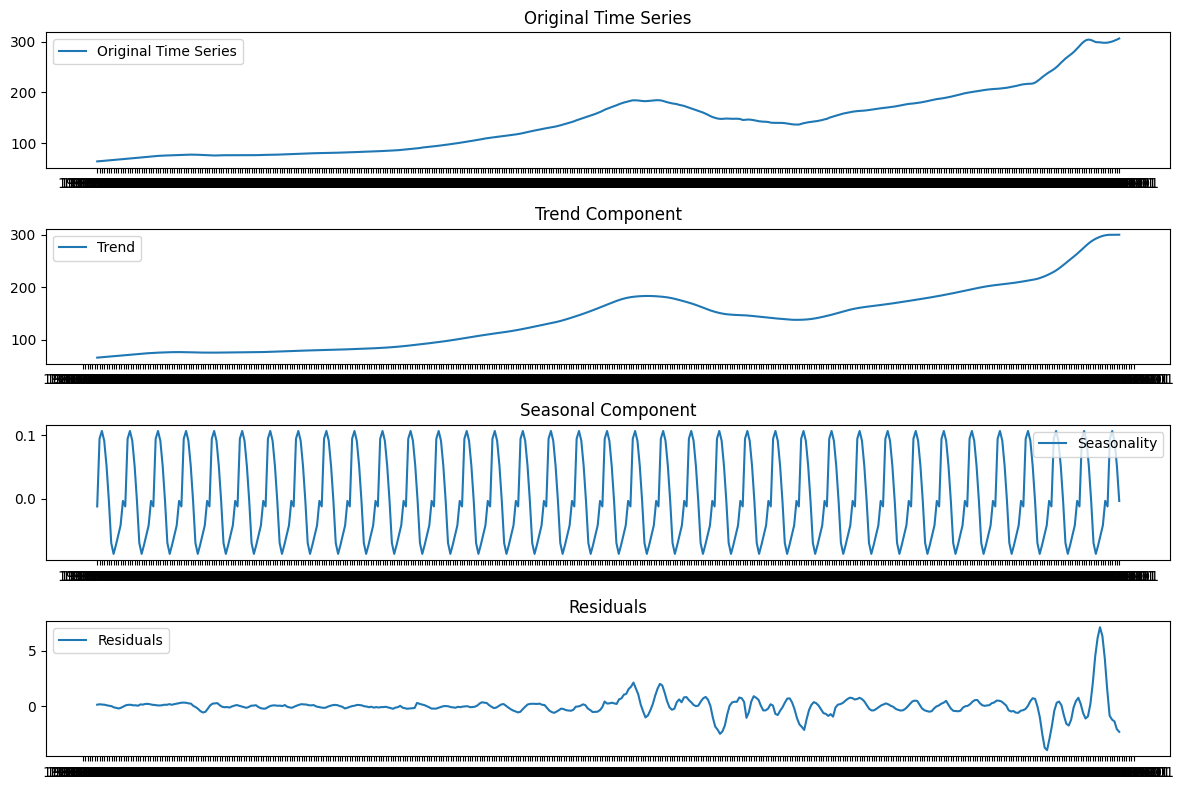

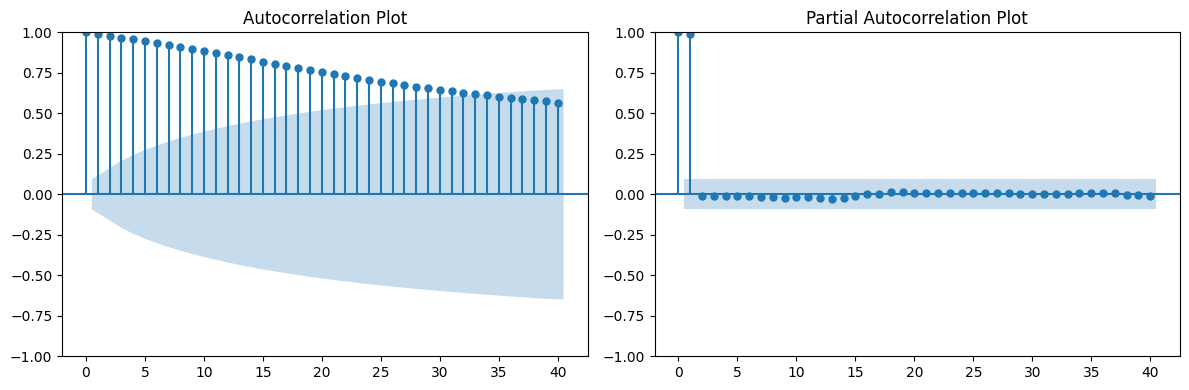

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Data Visualization

</div>


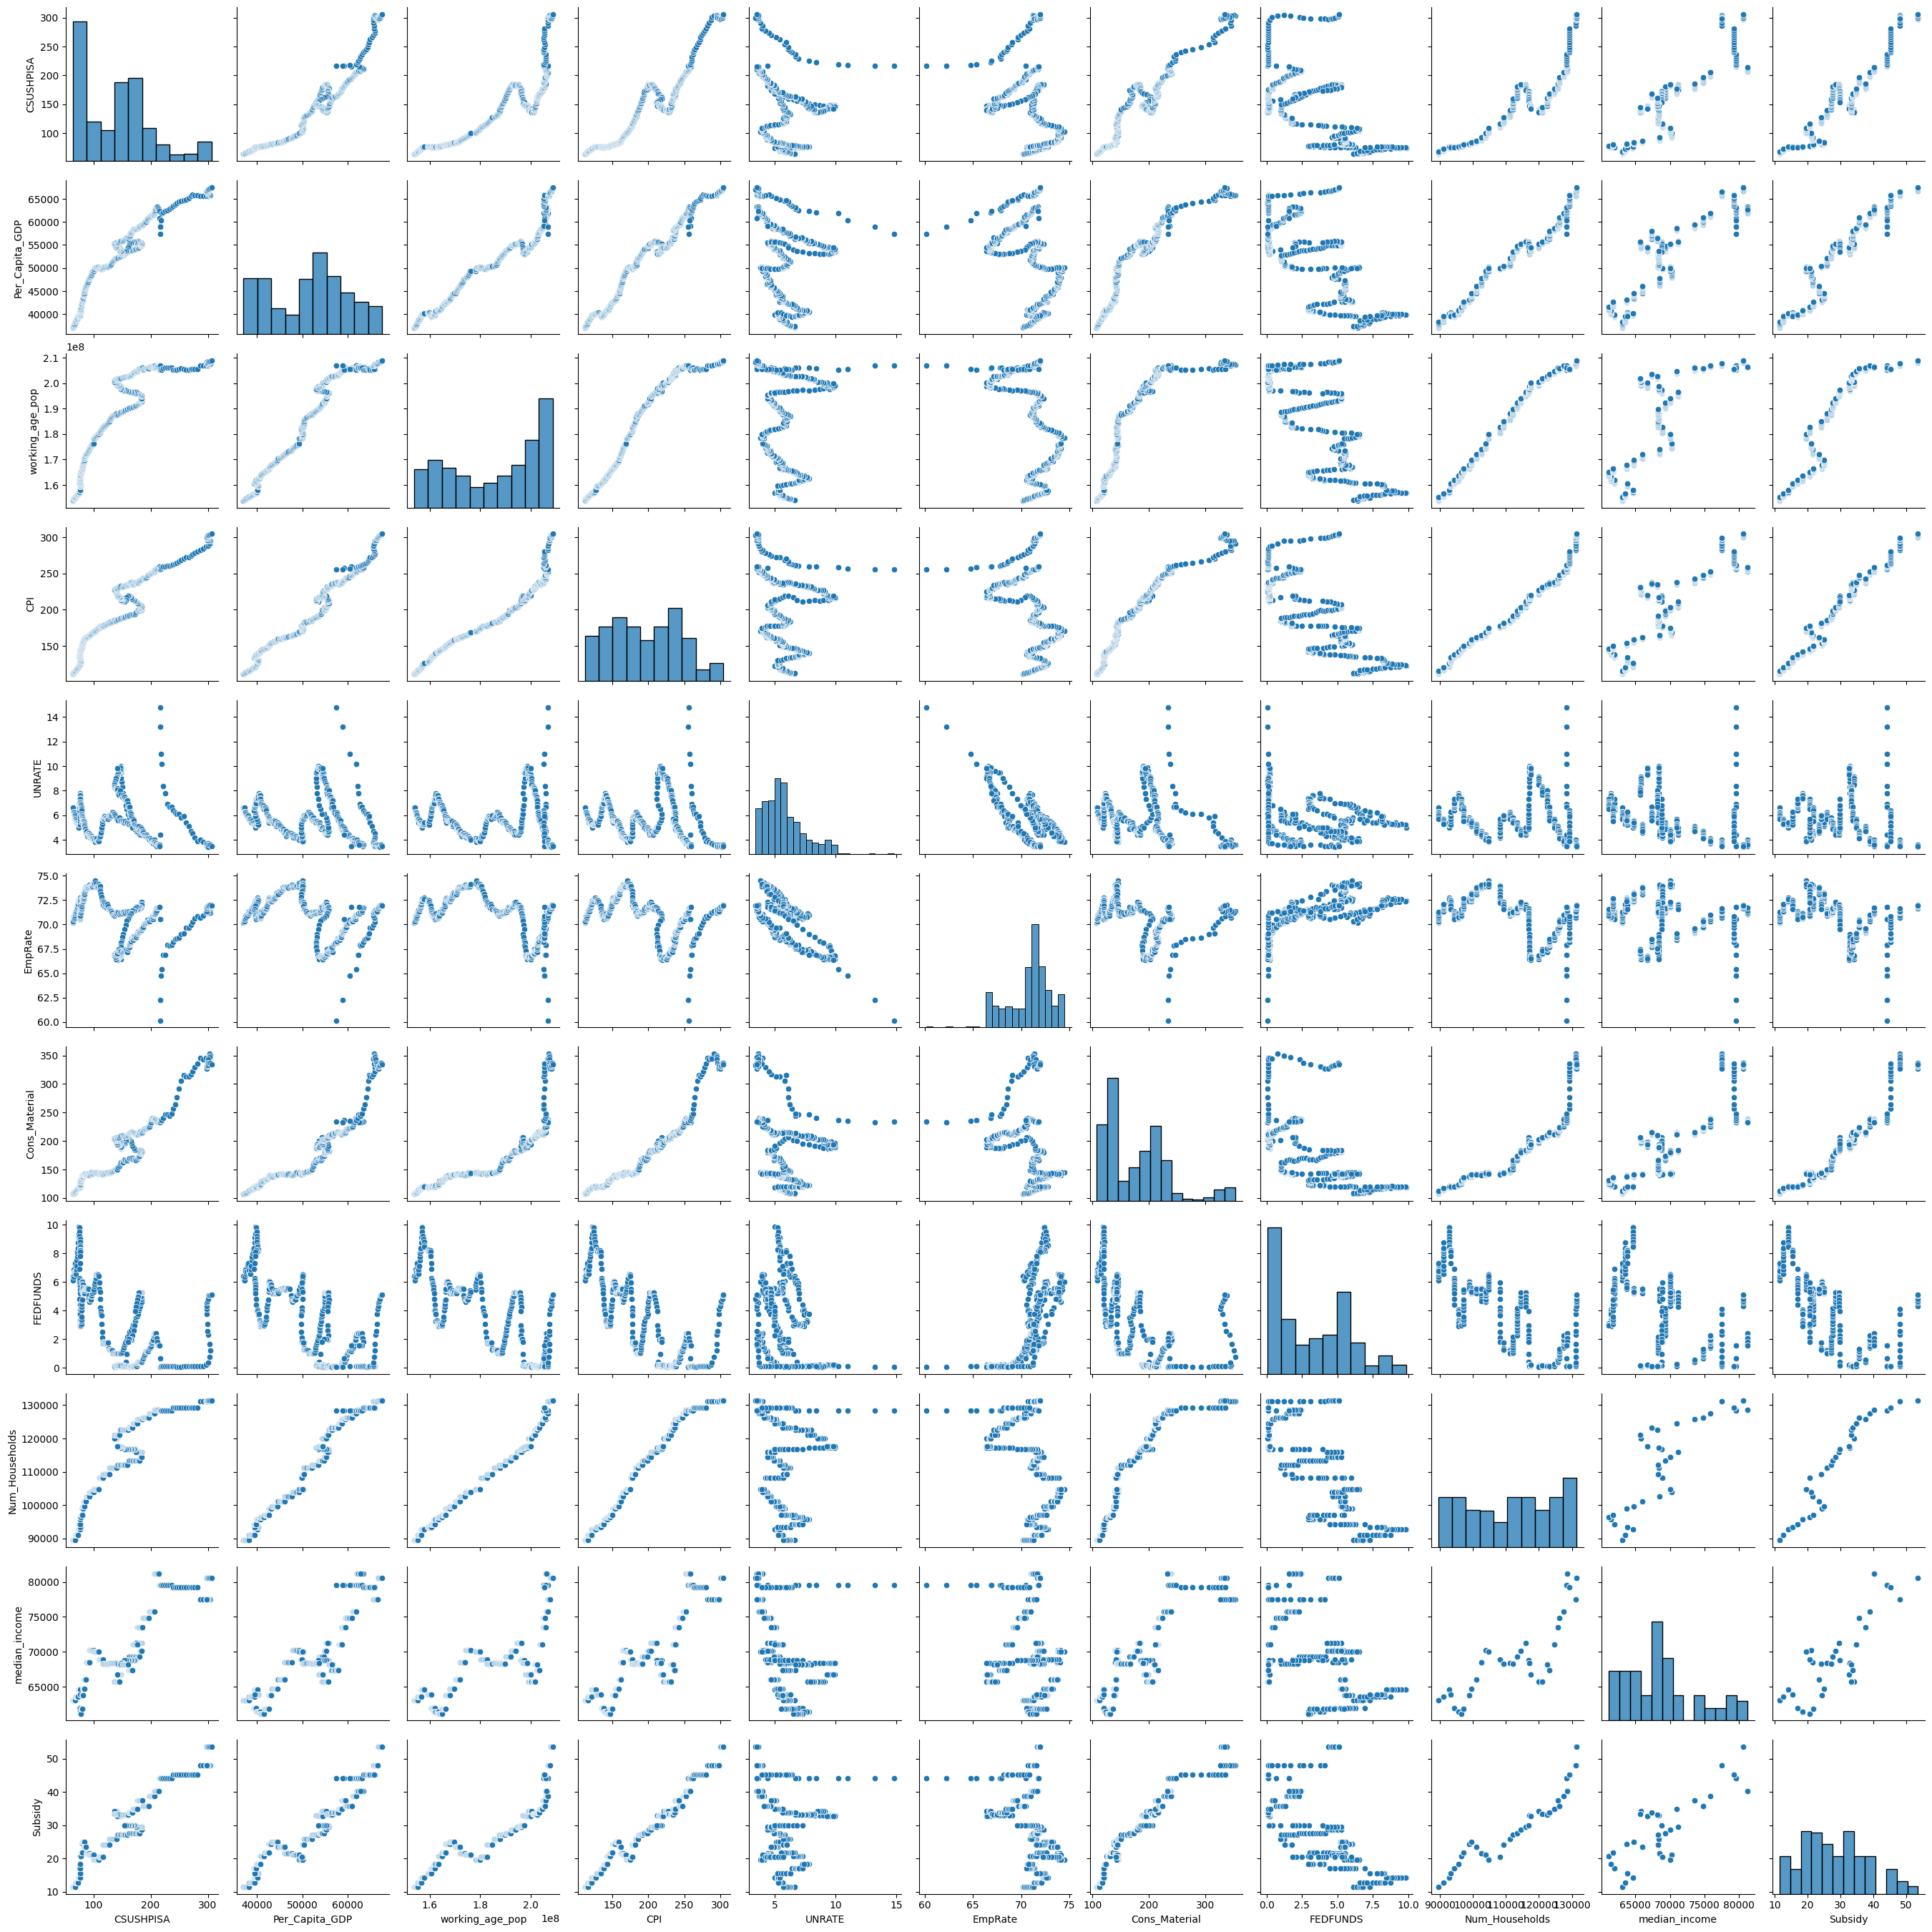

In [8]:
sns.pairplot(us_house_price_df)

In [9]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'CPI', 'UNRATE',
       'EmpRate', 'Cons_Material', 'FEDFUNDS', 'Num_Households',
       'median_income', 'Subsidy'],
      dtype='object')

In [10]:
factors = ['CSUSHPISA', 'UNRATE', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'Cons_Material', 'CPI', 'Num_Households', 'Subsidy', 'working_age_pop', 'median_income']

<Figure size 1300x800 with 0 Axes>

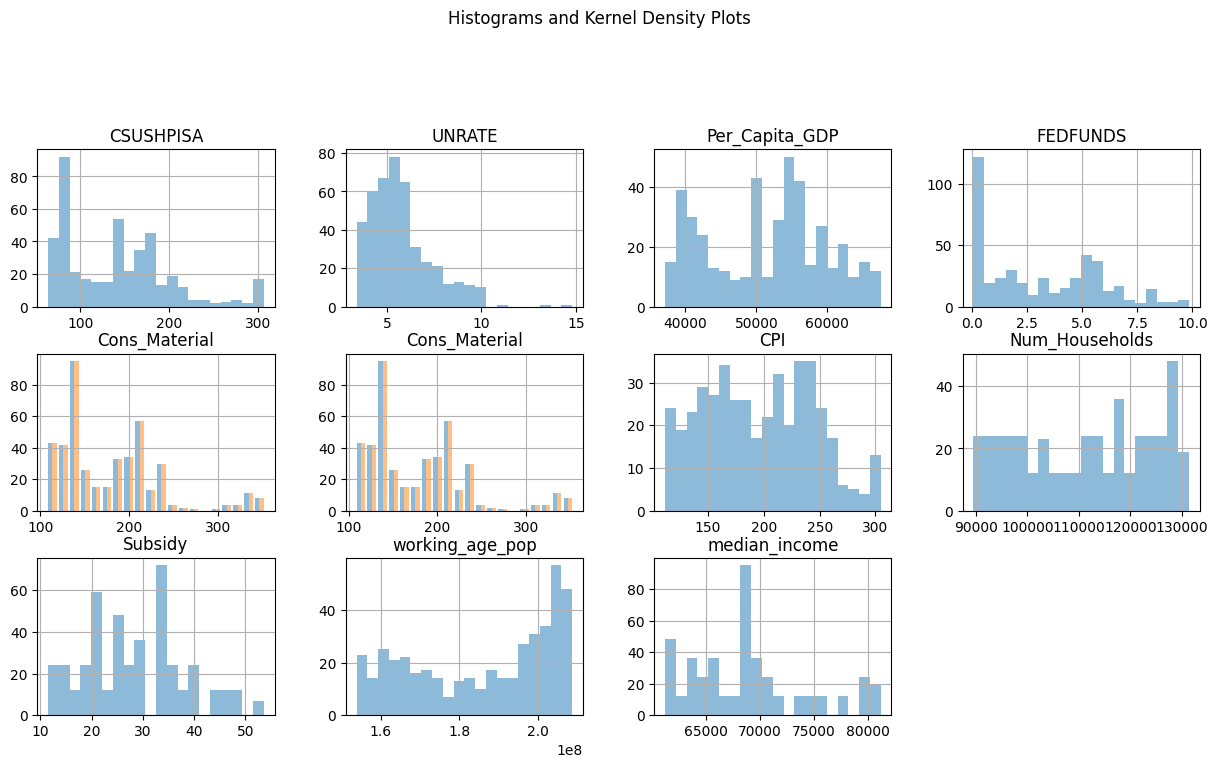

In [11]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Extract Features and Target

</div>


In [13]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Plotting scatter plots of the CASE-SHILLER index vs features¶

</div>


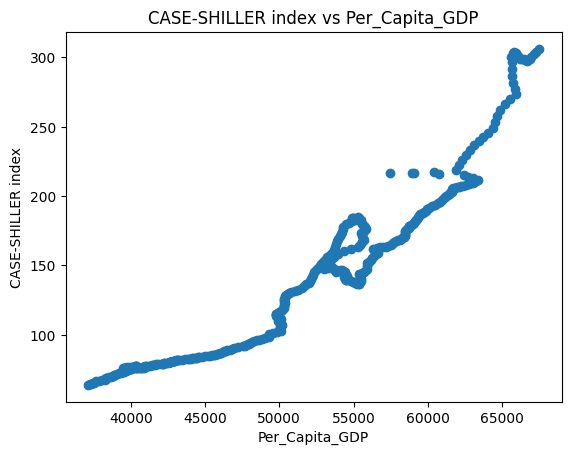

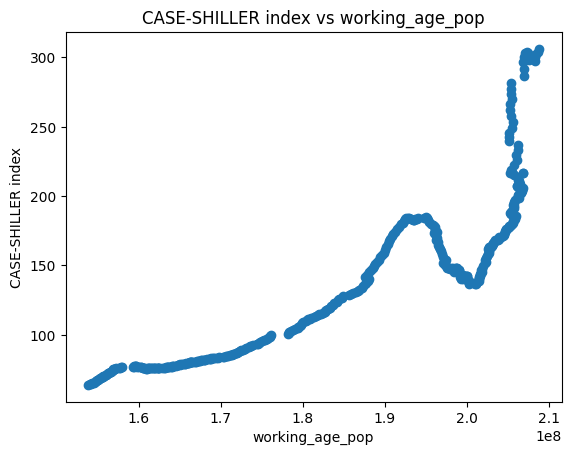

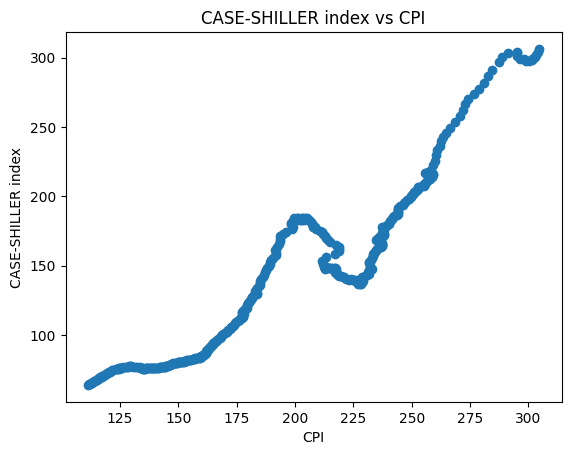

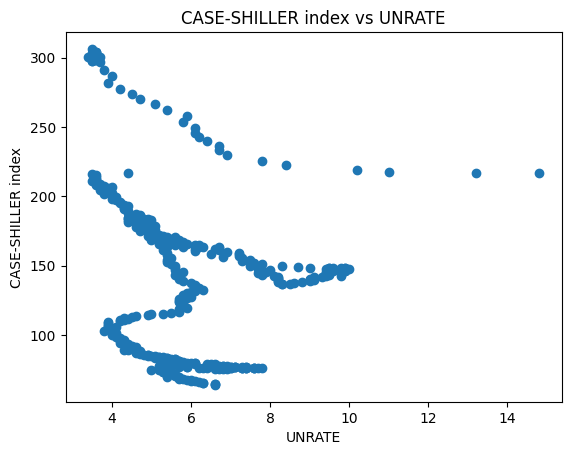

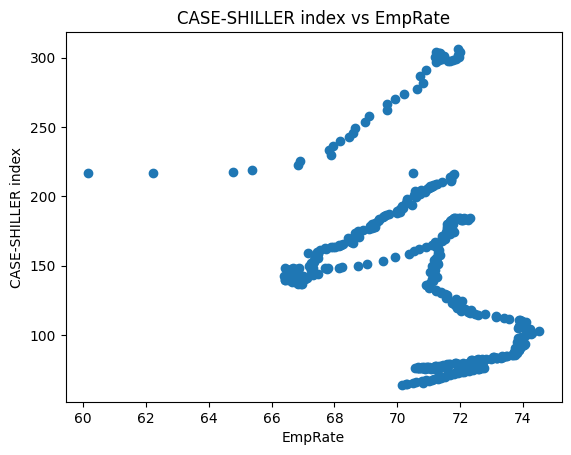

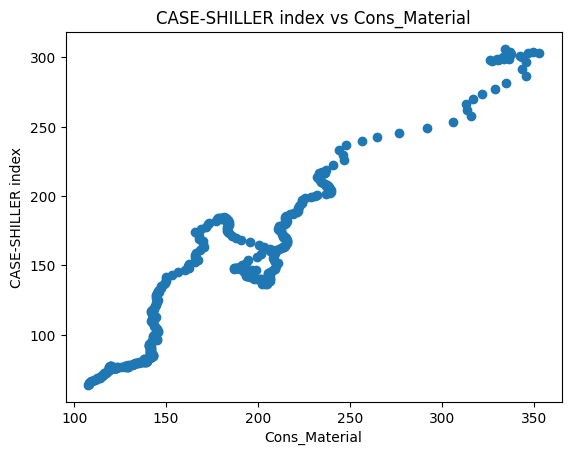

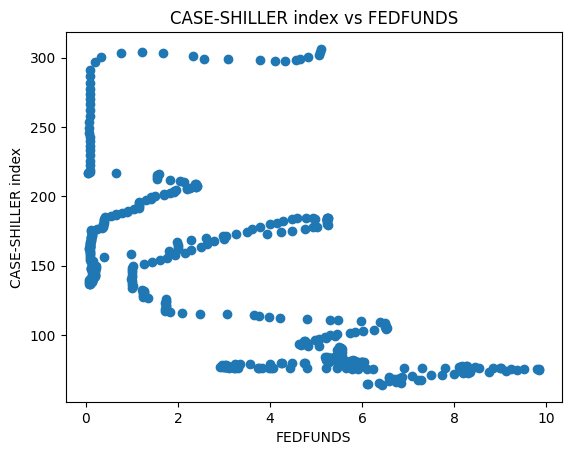

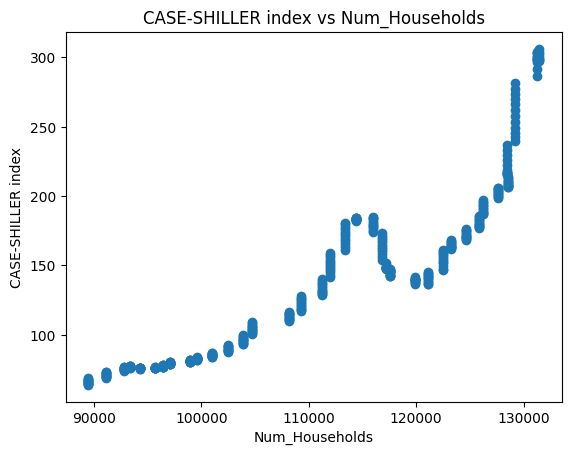

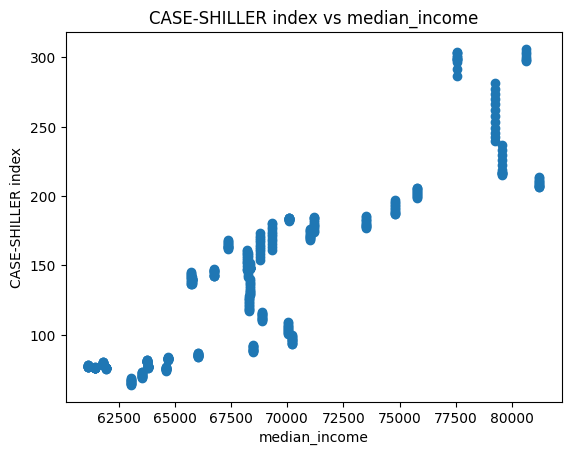

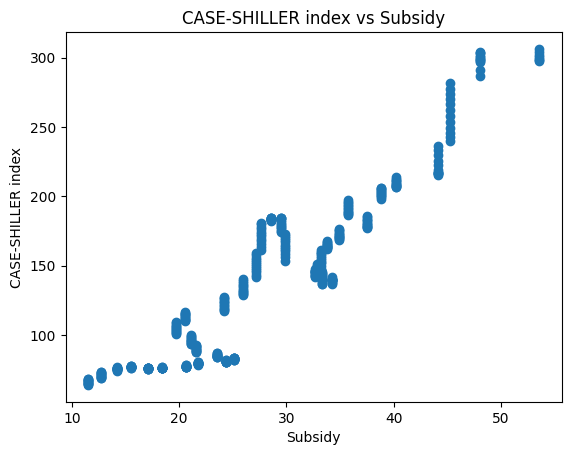

In [14]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Calculate Correlation Coefficients
</div>


In [15]:

correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
UNRATE             0.218695
EmpRate            0.342762
FEDFUNDS           0.572713
working_age_pop    0.874638
median_income      0.882179
Num_Households     0.913335
Subsidy            0.931368
CPI                0.941438
Per_Capita_GDP     0.947759
Cons_Material      0.956115
dtype: float64


### 📉 Features with Lower Correlation to the Target Variable

The following features show relatively **lower correlation** with the target variable, indicating that they may have a weaker linear relationship and contribute less directly to target prediction:

- **UNRATE (Unemployment Rate):** **0.2187**  
  Very weak correlation, suggesting this feature might not be helpful in predicting the target in a linear model.

- **EmpRate (Employment Rate):** **0.3428**  
  Low correlation, possibly due to overlapping effects with other employment-related variables.

- **FEDFUNDS (Federal Funds Rate):** **0.5727**  
  Moderate correlation — might capture some economic influence but not strongly tied to the target.

- **working_age_pop (Working Age Population):** **0.8746**  
  Getting closer to strong correlation, but still on the lower side compared to other top features.

- **median_income:** **0.8822**  
  Decent correlation, may indirectly affect the target through spending power or demand.

- **Num_Households:** **0.9133**  
  Approaching strong correlation, but still not among the very top predictors.

- **Subsidy:** **0.9314**  
  Shows strong correlation, but comparatively lower than the highest correlated features.

- **CPI (Consumer Price Index):** **0.9414**  
  Good correlation, could capture inflation trends affecting the target.

- **Per_Capita_GDP:** **0.9478**  
  Strong economic indicator, though not the top predictor here.

- **Cons_Material (Construction Material Index):** **0.9561**  
  Among the higher correlated features in this list, but still ranked below others in your dataset.

---

📌 **Interpretation:**  
While these features may still contribute to the model, especially those with correlation above **0.9**, their predictive power might be **less impactful** than features with even stronger correlation. Variables like **UNRATE** and **EmpRate** might be considered for removal or deeper analysis based on model performance and multicollinearity checks.


<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Data Science Models
</div>


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel


In [19]:
## We will drop the columns which has lower correlation with the target.

mult_cols = ["UNRATE", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [20]:
X

,Per_Capita_GDP,working_age_pop,CPI,Cons_Material,Num_Households,median_income,Subsidy
DATE,,,,,,,
1987-01-01,37132.000000,153837100,111.400,107.600,89479.0,63060,11.506
1987-02-01,37239.333333,154050900,111.800,107.900,89479.0,63060,11.506
1987-03-01,37346.666667,154193700,112.200,108.100,89479.0,63060,11.506
1987-04-01,37454.000000,154340400,112.700,108.300,89479.0,63060,11.506
1987-05-01,37531.000000,154526700,113.000,108.300,89479.0,63060,11.506
...,...,...,...,...,...,...,...
2023-02-01,66854.333333,208145900,301.643,331.729,131434.0,80610,53.573
2023-03-01,66945.000000,208264600,302.858,333.366,131434.0,80610,53.573
2023-04-01,67129.666667,208483500,303.316,337.473,131434.0,80610,53.573


<div style="border: 2px solid #4CAF50; background-color: #f0f9f0; padding: 16px; border-radius: 8px;">

### 📘 Models building
</div>


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

In [25]:
# Fit and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

Linear Regression:
  Mean Squared Error: 149.7452
  R² Score: 0.9690
----------------------------------------
ElasticNet:
  Mean Squared Error: 293.0277
  R² Score: 0.9393
----------------------------------------
Random Forest:
  Mean Squared Error: 1.5232
  R² Score: 0.9997
----------------------------------------
Gradient Boosting:
  Mean Squared Error: 3.0470
  R² Score: 0.9994
----------------------------------------
SVR:
  Mean Squared Error: 1623.3551
  R² Score: 0.6637
----------------------------------------


### 🔍 Model Performance Summary

Below is the performance comparison of various regression models on the test dataset using **Mean Squared Error (MSE)** and **R² Score**:

- **Linear Regression**:
  - **MSE:** 149.75
  - **R² Score:** 0.9690  
  This model performs quite well with a high R², but there is still room for improvement in error reduction.

- **ElasticNet**:
  - **MSE:** 293.03
  - **R² Score:** 0.9393  
  Shows decent performance, but both the error and R² score are worse than Linear Regression, indicating underfitting.

- **Random Forest Regressor**:
  - **MSE:** 1.52
  - **R² Score:** 0.9997  
  This model performs exceptionally well with **very low error** and **almost perfect R²**, making it the **best model** in this comparison.

- **Gradient Boosting Regressor**:
  - **MSE:** 3.05
  - **R² Score:** 0.9994  
  Also a **strong performer**, slightly less accurate than Random Forest but still highly reliable.

- **Support Vector Regressor (SVR)**:
  - **MSE:** 1623.36
  - **R² Score:** 0.6637  
  This model struggles on this dataset, with **high error** and a relatively **low R² score**, indicating it may not be suitable for this problem without further tuning.

---

📌 **Conclusion:**  
Both **Random Forest** and **Gradient Boosting** outperform the rest with near-perfect accuracy and minimal error. In contrast, **SVR** shows the weakest performance. Linear models like **Linear Regression** and **ElasticNet** perform decently but are outshined by tree-based methods.
